<a href="https://colab.research.google.com/github/Abmhd/IJulia.jl/blob/master/example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <font size="6">سنبدأ باستيراد صفوف نحتاجها لتكوين  كائنات تمثل الشيكة  
</font>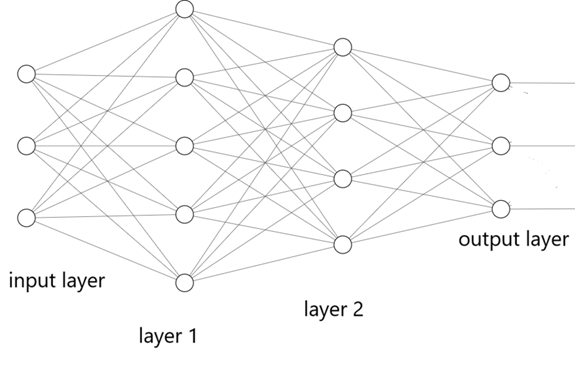

In [2]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input


<font size=6>
<font\>

<font size="6"> الان نحدد الكائن الذي يمثل الشبكة
<font/>

In [2]:
mymodel = Sequential([
    Input(shape=(3,),name='input  layer'),
    Dense(5, activation='relu',name='layer 1'),  # Layer 1
    Dense(4, activation='relu',name='layer 2'),                     # Layer 2
    Dense(3, activation='relu',name='output layer')                      # Layer 3
])

mymodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer 1 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer 2 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output layer (Dense)            │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59 (236.00 B)

 Trainable params: 59 (236.00 B)

 Non-trainable params: 0 (0.00 B)

<font size="6">الان نحدد الكائن الذي يمثل الشبكة التي سنستخدمها في مثال الانحدار
<font/>

In [10]:

model2 = Sequential([
    Input (shape=(1,)),
    Dense(1,name="output")
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

<font size="6"> ثم نعد الكائن
<font/>

In [11]:
from tensorflow.keras.optimizers import SGD

model2.compile(optimizer=SGD(learning_rate=0.05), loss='mse')

<font size="6">
 الان نكون البيانات و نرسمها
<font/>

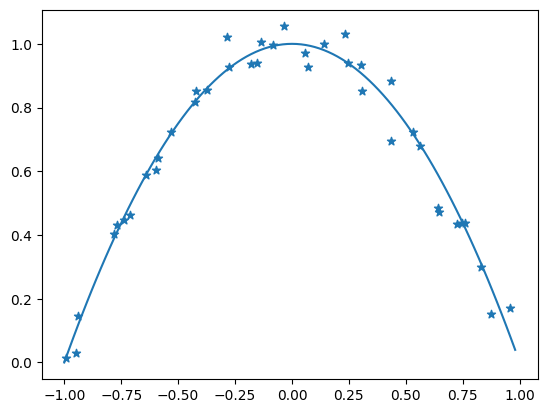

In [8]:
from matplotlib import pyplot as plt
import numpy as np

x = np.array([x/20 +0.05*np.random.normal() for x in range(-20,20)] ,dtype=float)
y=np.array([1-z**2 + +0.05*np.random.normal() for z in x] )
plt.scatter(x,y,marker="*")
xg=[1/50*x for x in range(-50,50)]
yg=[1-z**2 for z in xg]
plt.plot(xg,yg)
plt.show()

<font size="6">
الان نطابق الكائن مع البيانات هذا سيحدد القيم الامثل للبارامترات
<font/>

In [12]:
model2.fit(x, y, epochs=200, verbose=0)

<font size="6">
نستخرج القيم الامثل للبارامترات
<font/>

In [14]:
wghts=model2.get_weights()
print(wghts)

[array([[0.01723467]], dtype=float32), array([0.66141707], dtype=float32)]


<font size="6">
نوجد قيم البارامترات كاعداد
<font/>

In [15]:
a=wghts[0][0][0];b=wghts[1][0];print(a,b)

0.017234672 0.66141707


<font size="6">
نستخدم القيم التي حصلنا عليها لنرسم خط الانحدار مع البيانات
<font/>

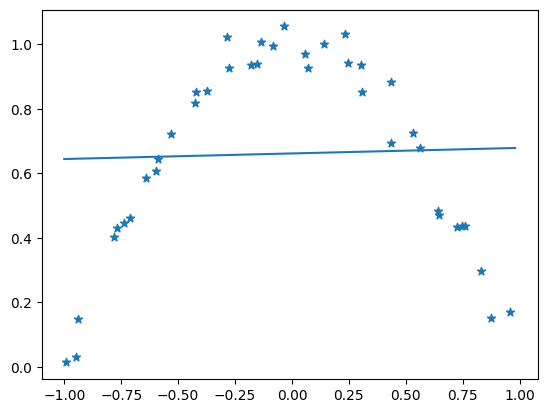

In [16]:
plt.scatter(x,y,marker="*")
plt.plot(xg,[a*z+b for z in xg])